In [5]:
%run pylib/fermi_sources-orig
fs_data = FermiSources('files/fermi_sources_v2.csv')
train = fs_data.dataset('log_nbb pindex curvature log_e0 category'.split(), 'bll fsrq psr'.split())

Read 6699 source entries from `files/fermi_sources_v2.csv`, selected 6239 with criteria 'delta<0.2 & curvature<0.9'

In [3]:
df = pd.read_csv("files/fermi_sources_v2.csv")

In [6]:
X,y = train.Xy
#y = np.zeros(ay.size)

In [7]:
X

log_nbb    pindex  curvature    log_e0
name                                                      
4FGL J0001.2-0747  0.301030  2.075954   0.030166  3.298818
4FGL J0001.4-0010  0.954243  1.996587   0.080497  3.559103
4FGL J0001.5+2113  1.633468  2.634344   0.148432  2.594363
4FGL J0002.1-6728  0.301030  1.727308   0.150332  3.668795
4FGL J0002.8+6217  0.301030  1.044642   0.432996  3.205186
...                     ...       ...        ...       ...
4FGL J2255.8-6543  0.301030  2.885552   0.043628  2.594375
4FGL J2314.0+1445  1.113943  1.881615   0.011841  3.504022
4FGL J2321.7-6438  0.845098  2.095885   0.024455  3.197446
4FGL J2358.3-1021  1.041393  2.554469   0.093428  2.680488
4FGL J2359.3-2049  0.301030  2.029849  -0.032168  3.332390

[2537 rows x 4 columns]

In [137]:
X.iloc[:,2:4]

curvature    log_e0
name                                  
4FGL J0001.2-0747   0.030166  3.298818
4FGL J0001.4-0010   0.080497  3.559103
4FGL J0001.5+2113   0.148432  2.594363
4FGL J0002.1-6728   0.150332  3.668795
4FGL J0002.8+6217   0.432996  3.205186
...                      ...       ...
4FGL J2255.8-6543   0.043628  2.594375
4FGL J2314.0+1445   0.011841  3.504022
4FGL J2321.7-6438   0.024455  3.197446
4FGL J2358.3-1021   0.093428  2.680488
4FGL J2359.3-2049  -0.032168  3.332390

[2537 rows x 2 columns]

In [85]:
for t in range(ay.size):
    if ay[t] == 'bll':
        y[t] = 0
    elif ay[t] == 'fsrq':
        y[t] = 1
    elif ay[t] == 'psr':
        y[t] = 2

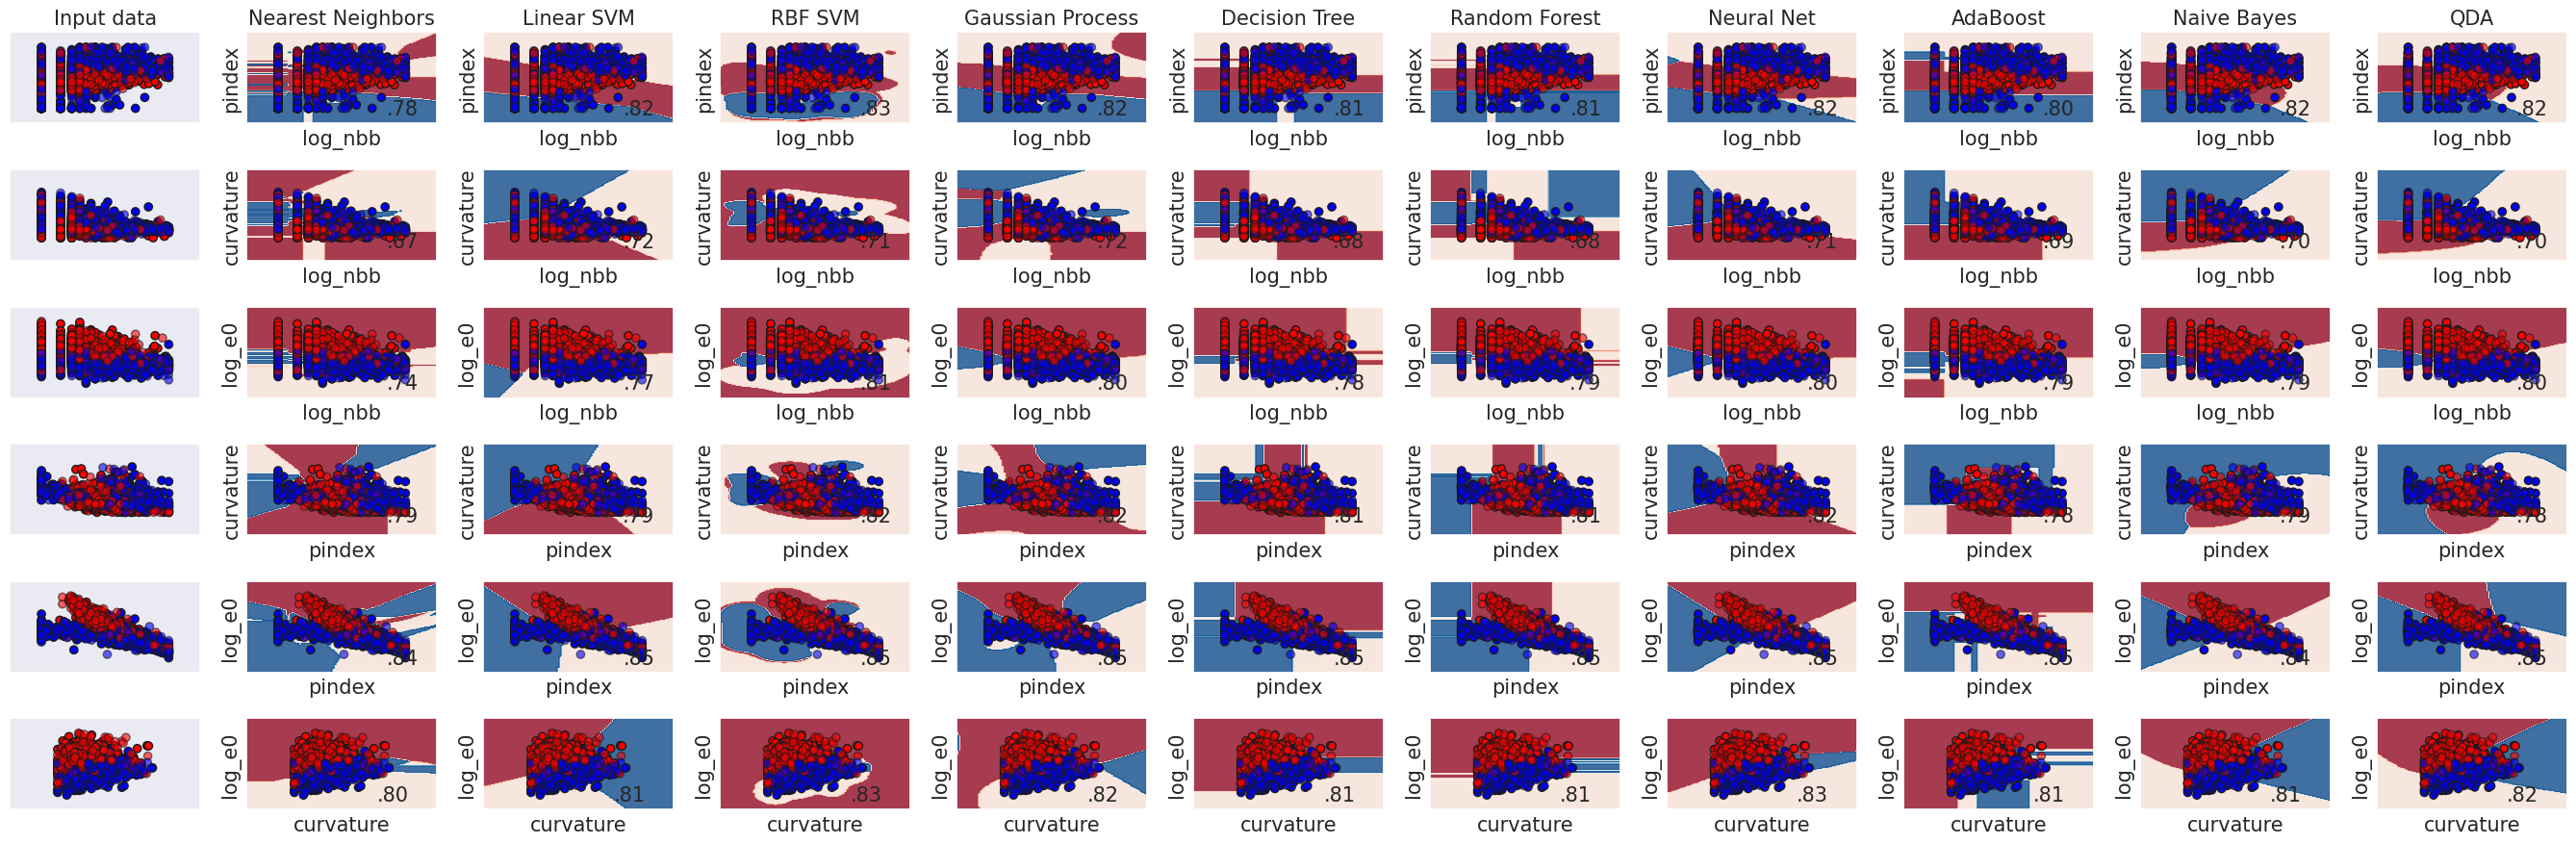

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=4),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

theX, they = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_classes=3, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
theX += 2 * rng.uniform(size=theX.shape)
linearly_separable = (theX, they)

# the data sets
datasets = [
    (X.iloc[:,:2],y), #log_nbb and pindex
    (X.iloc[:,::2],y), #log_nbb and curvature
    (X.iloc[:,::3],y), #log_nbb and log e0
    (X.iloc[:,1:3],y), #pindex and curvature
    (X.iloc[:,1::2],y), #pindex and e0
    (X.iloc[:,2:4],y) #curvature and e0
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    theX, they = ds
    X_train, X_test, y_train, y_test = train_test_split(
        theX, they, test_size=0.4, random_state=42
    )

    x_min, x_max = theX.iloc[:, 0].min() - 0.5, theX.iloc[:, 0].max() + 0.5
    y_min, y_max = theX.iloc[:, 1].min() - 0.5, theX.iloc[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train.to_numpy(dtype='int64'))
        score = clf.score(X_test, y_test.to_numpy(dtype='int64'))
        DecisionBoundaryDisplay.from_estimator(
            clf, theX, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test.iloc[:, 0],
            X_test.iloc[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

make 10 plots (1 for each classifier) with 1 variable for each axis (variables used for training), have the resulting plots have 3 colors for the source classification.


Step 1: Train the program and isolate all the unidentified sources

Step 2: Select 2 variables to plot

Step 3: Be able to have 3 catagories

Step 4: Make scatter plot of sources

Step 5: Test accuracy of sources using different classifiers

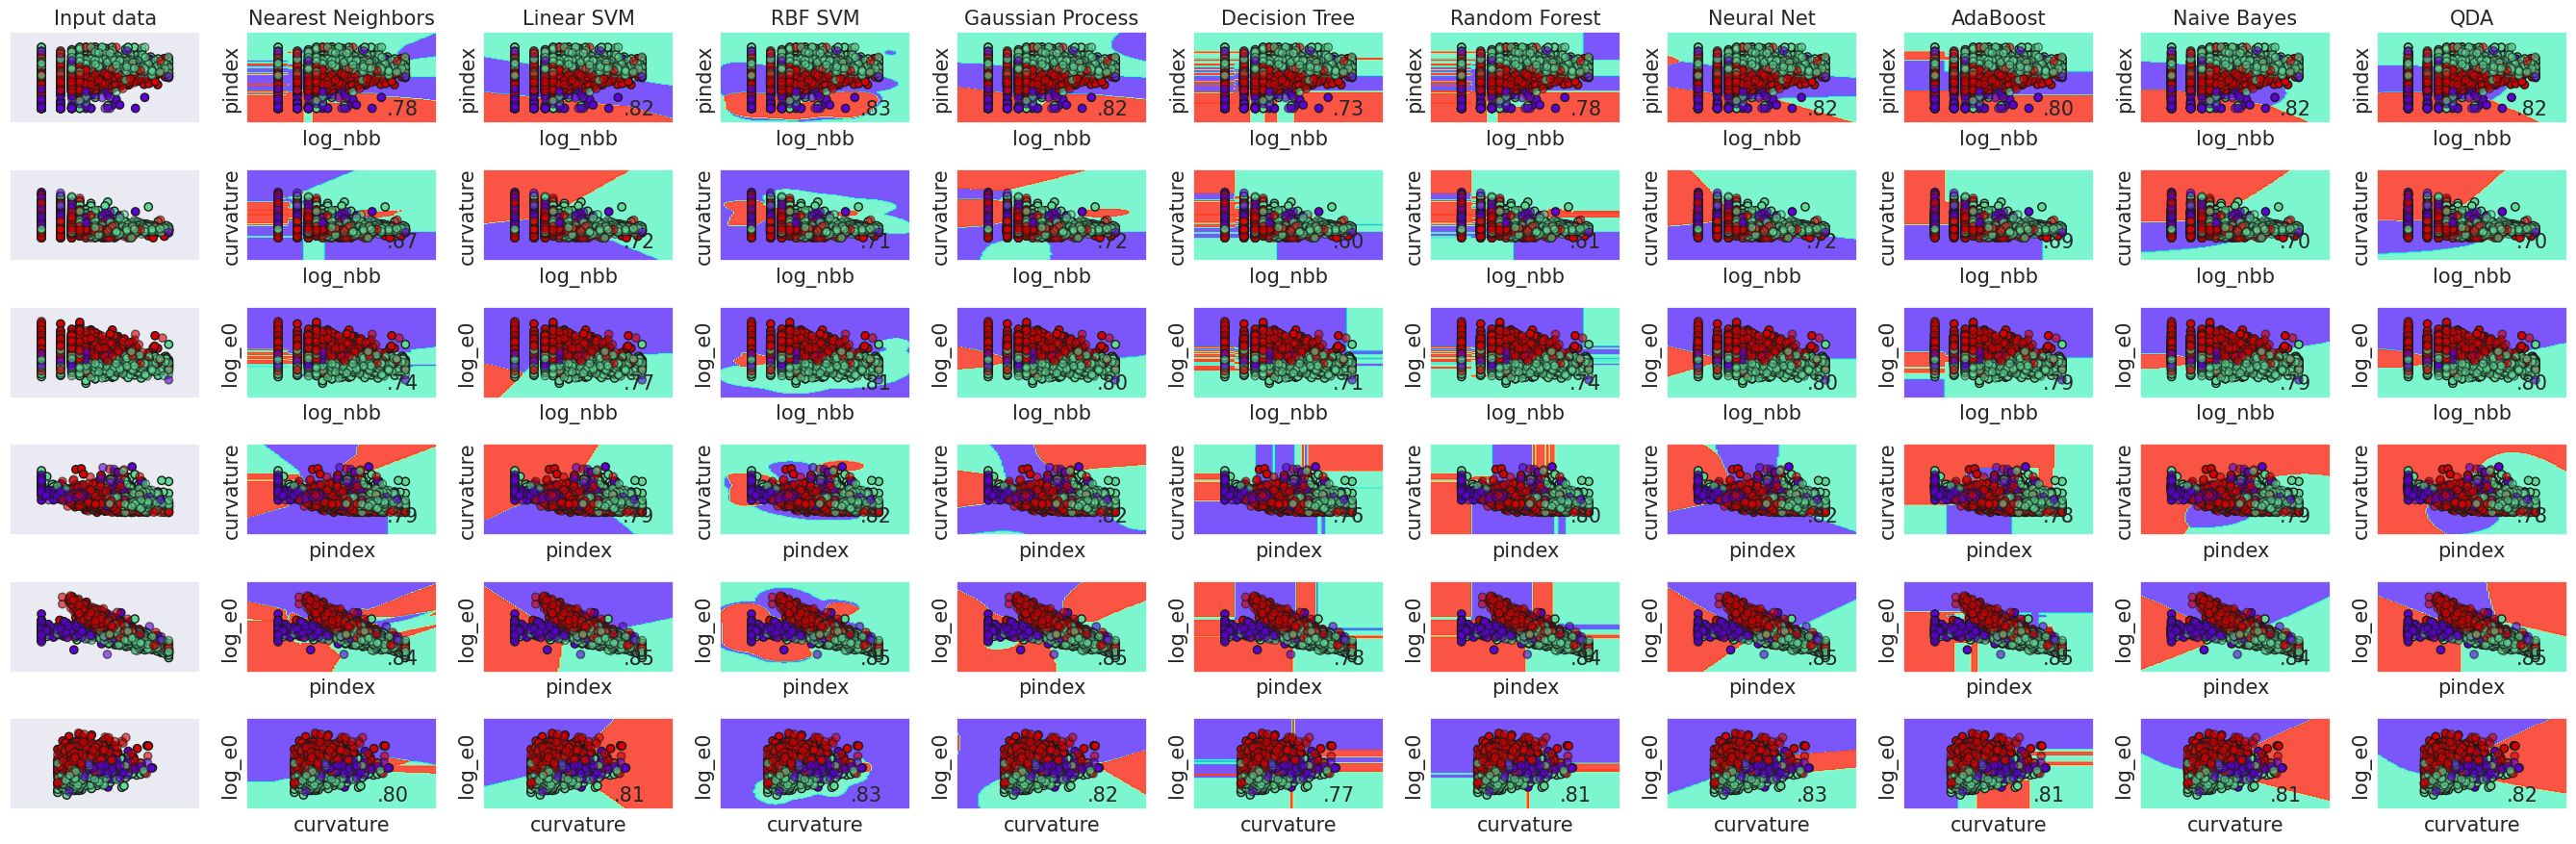

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, max_features=2),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

theX, they = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_classes=3, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
theX += 2 * rng.uniform(size=theX.shape)
linearly_separable = (theX, they)

# the data sets
datasets = [
    (X.iloc[:,:2],y), #log_nbb and pindex
    (X.iloc[:,::2],y), #log_nbb and curvature
    (X.iloc[:,::3],y), #log_nbb and log e0
    (X.iloc[:,1:3],y), #pindex and curvature
    (X.iloc[:,1::2],y), #pindex and e0
    (X.iloc[:,2:4],y) #curvature and e0
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    theX, they = ds
    X_train, X_test, y_train, y_test = train_test_split(
        theX, they, test_size=0.4, random_state=42
    )

    x_min, x_max = theX.iloc[:, 0].min() - 0.5, theX.iloc[:, 0].max() + 0.5
    y_min, y_max = theX.iloc[:, 1].min() - 0.5, theX.iloc[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.rainbow
    cm_bright = ListedColormap(["#DB0000", "#5EDA94", "#5F00DB"]) #in order: bll, fsrq, psr
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train.to_numpy(dtype='int64'))
        score = clf.score(X_test, y_test.to_numpy(dtype='int64'))
        DecisionBoundaryDisplay.from_estimator(
            clf, theX, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test.iloc[:, 0],
            X_test.iloc[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [38]:
unid = fs_data.dataset('log_nbb pindex curvature log_e0  abs_sin_b log_eflux category'.split(), ['unid'])

In [ ]:
y_train

name
4FGL J1049.5+1548    0
4FGL J1256.2-1146    0
4FGL J0956.0+3936    1
4FGL J2129.8-0428    2
4FGL J1326.8-5256    0
                    ..
4FGL J1549.8-3044    0
4FGL J1113.9+5523    0
4FGL J1130.5-7801    0
4FGL J1248.7+5127    0
4FGL J0913.3+8133    0
Name: category, Length: 1522, dtype: object

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0e6a510910>
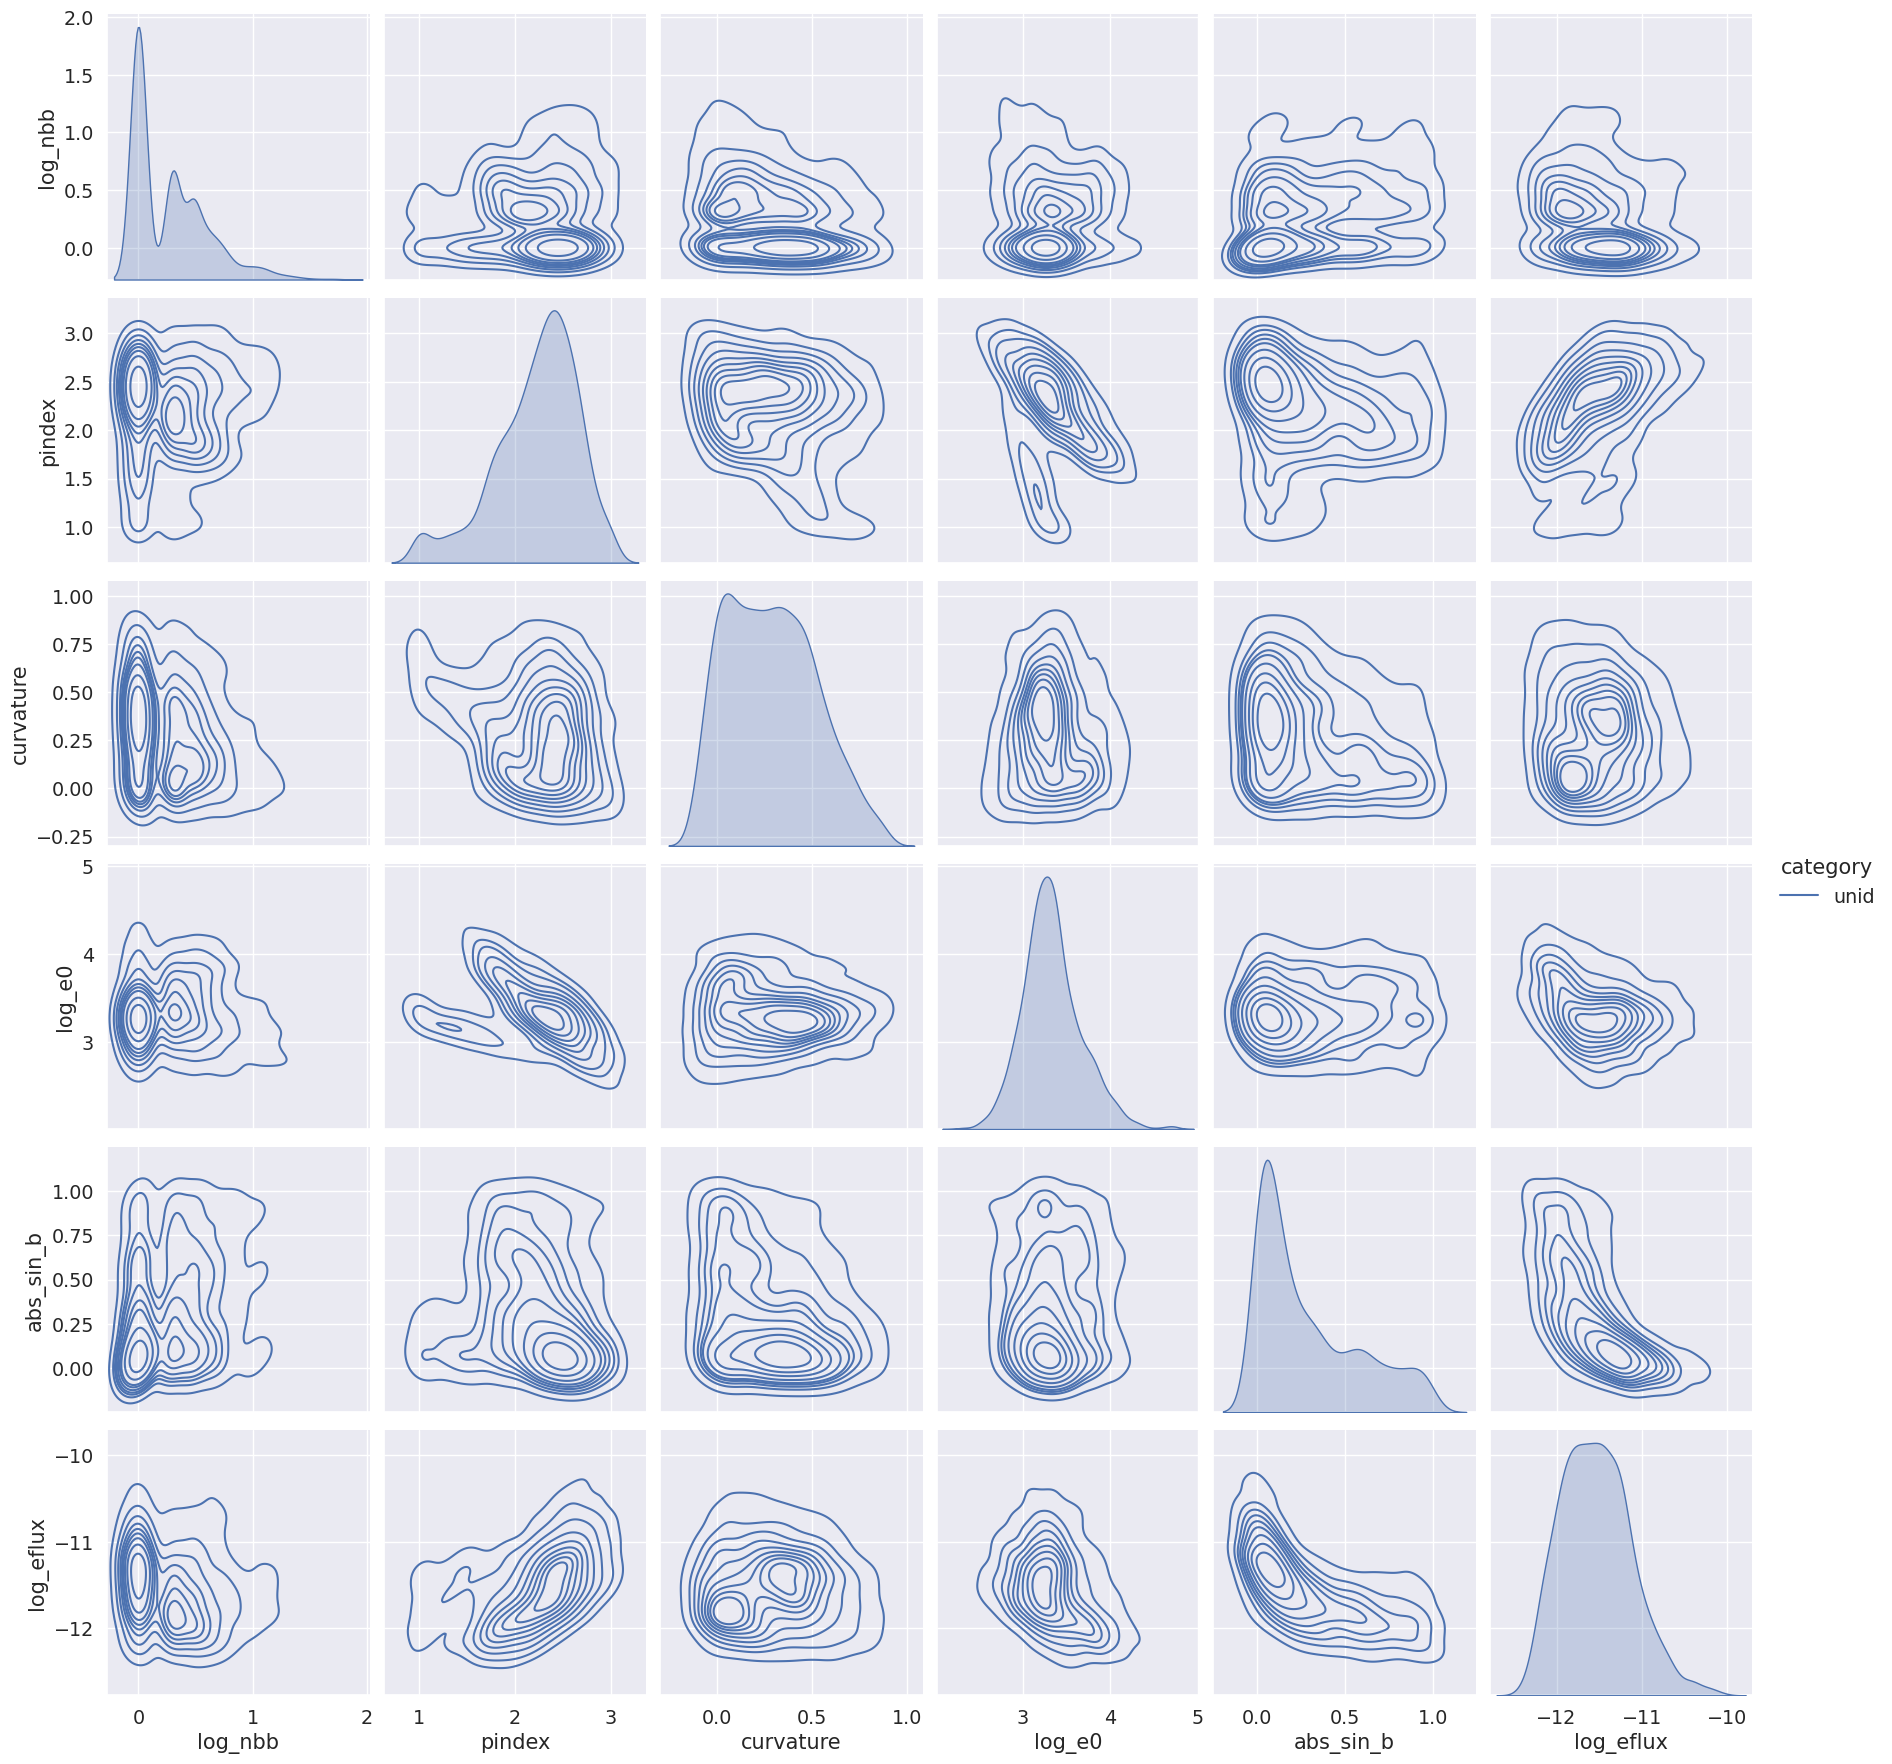

In [39]:
show(unid.pairplot(height=3))

DataSet with 1870 sources<br>
*   Features: ['log_nbb', 'pindex', 'curvature', 'log_e0', 'abs_sin_b', 'log_eflux']<br>
*  category: {'bll': 791, 'fsrq': 438, 'psr': 641}

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0e6976beb0>
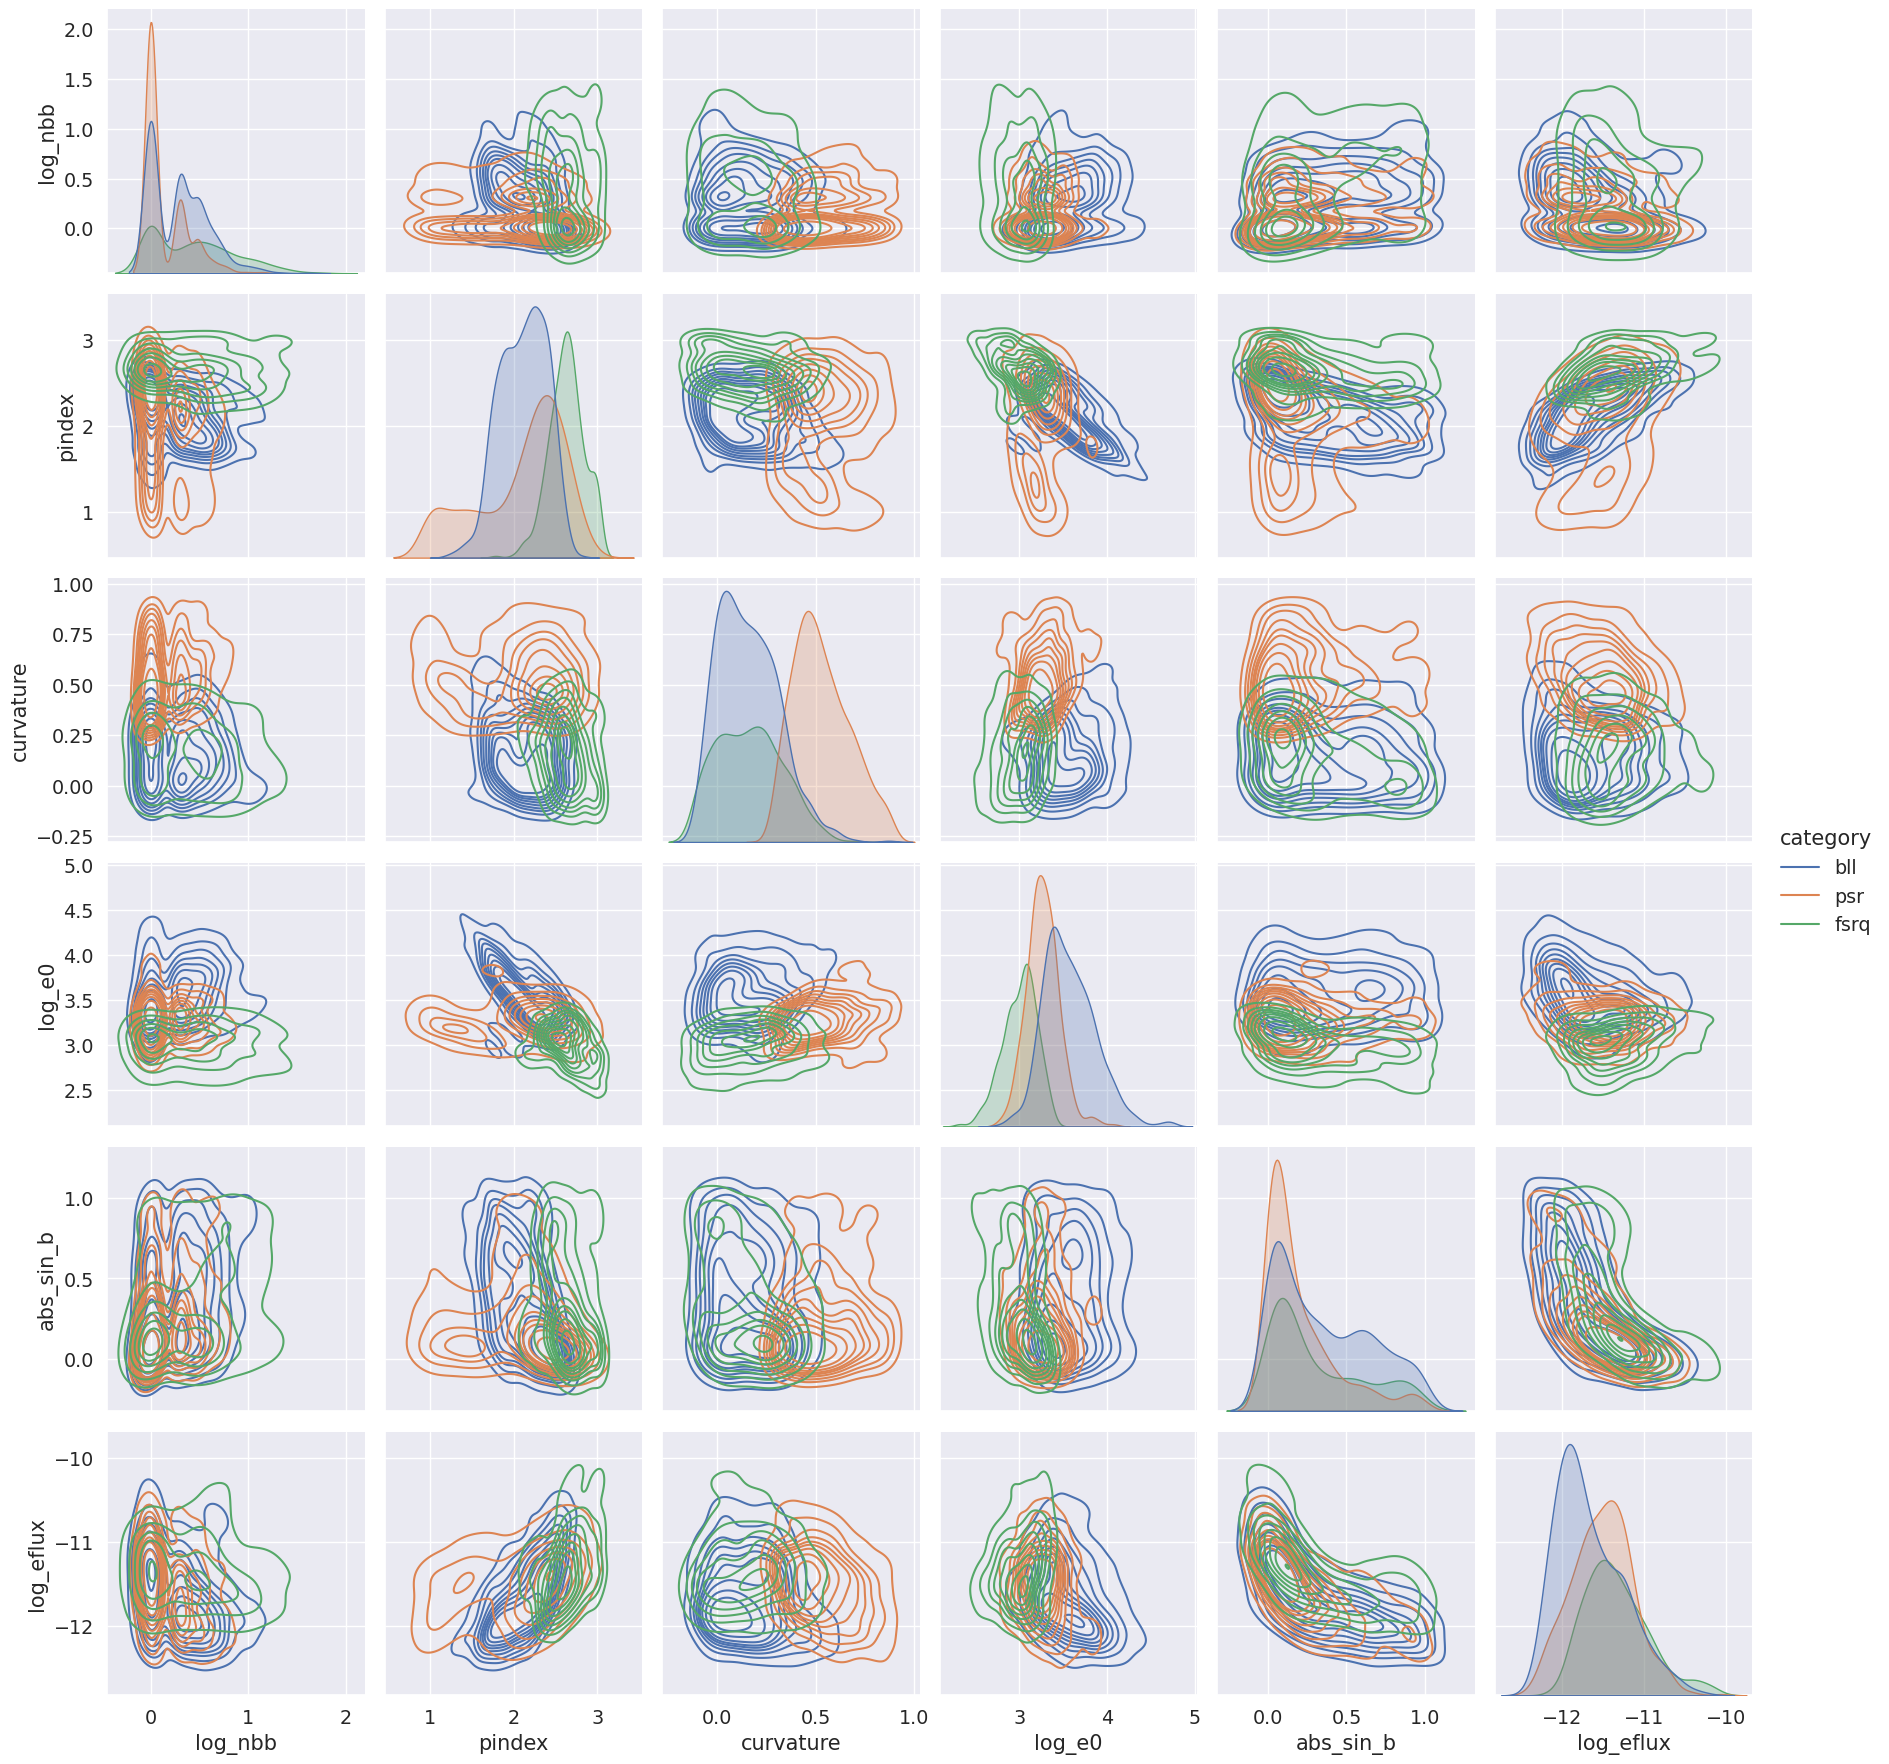

In [40]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
classifier = train.fit(model) # make the model a classifier
unid.predict(classifier) 
# apply it to the unids
show(str(unid).replace('\n','<br>\n* '))
show(unid.pairplot(height=3))

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0e69b25e20>
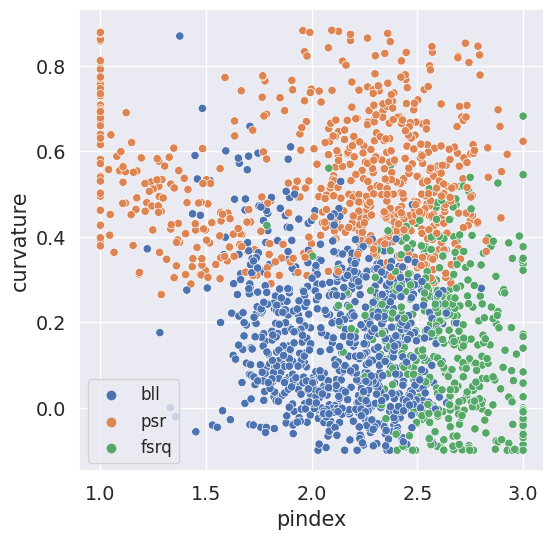

In [41]:
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(unid, x='pindex', y='curvature', hue='category');
ax.legend(fontsize=12);
show(fig)

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0e697548b0>
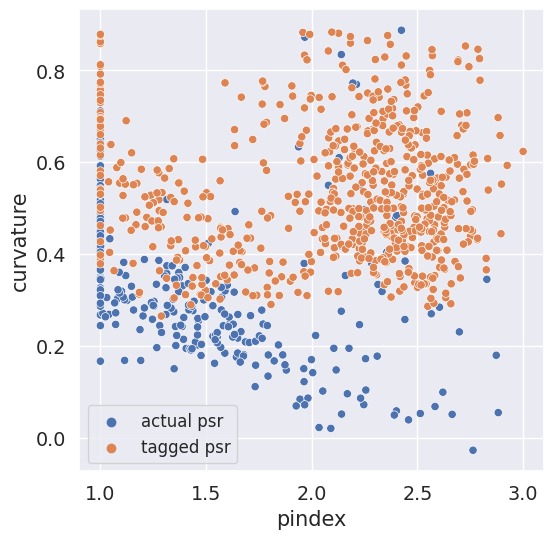

In [42]:
def psr_comparison( fs_data, unid):
    real_psr = fs_data.dataset(unid.columns,['psr']).copy()
    real_psr.category = 'actual psr'
    tagged_psr = unid.query('category=="psr"').copy()
    tagged_psr.category='tagged psr'
    return DataSet(pd.concat([real_psr,tagged_psr]))
pcompdata = psr_comparison(fs_data, unid)
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(pcompdata, x='pindex', y='curvature', hue='category', ax=ax)
ax.legend(fontsize=12)
show(plt.gcf())

In [43]:
unid

log_nbb    pindex  curvature    log_e0  abs_sin_b  \
name                                                                    
4FGL J0000.3-7355  0.000000  2.083958   0.217188  3.449785   0.678619   
4FGL J0000.5+0743  0.000000  1.000000   0.389761  3.167000   0.798306   
4FGL J0001.6+3503  0.000000  1.064473   0.363395  3.161251   0.449694   
4FGL J0003.3+2511  0.477121  2.347659   0.156343  3.087088   0.594534   
4FGL J0004.0+5715  0.000000  2.533380   0.109810  3.046546   0.088315   
...                     ...       ...        ...       ...        ...   
4FGL J2247.7-5857  0.477121  1.942175   0.204112  3.525917   0.784381   
4FGL J2320.1-2440  0.301030  2.239576  -0.082781  3.254470   0.935823   
4FGL J2323.9+6219  0.000000  3.000000   0.057291  2.916398   0.020634   
4FGL J2359.3+2502  0.301030  1.989034   0.134538  3.642776   0.592671   
4FGL J2355.5-6614  0.477121  2.371837   0.367091  2.912821   0.765705   

                   log_eflux category  
name                                   
4FGL J0000.3-7355 -12.005535      bll  
4FGL J0000.5+0743 -11.975037      psr  
4FGL J0001.6+3503 -11.852458      psr  
4FGL J0003.3+2511 -11.625315     fsrq  
4FGL J0004.0+5715 -11.302439     fsrq  
...                      ...      ...  
4FGL J2247.7-5857 -12.212086      bll  
4FGL J2320.1-2440 -11.617139      bll  
4FGL J2323.9+6219 -11.144927     fsrq  
4FGL J2359.3+2502 -12.072814      bll  
4FGL J2355.5-6614 -11.497450     fsrq  

[1870 rows x 7 columns]

In [ ]:
real_psr = fs_data.dataset(unid.columns,['psr']).copy()
tagged_psr = unid.query('category=="psr"').copy()
sns.scatterplot(